In [2]:
import sys
sys.path.append('/content/drive/MyDrive/colab')
PACKAGE_PATH = '/content/drive/MyDrive/colab/packages'
if PACKAGE_PATH not in sys.path:
    sys.path.append(PACKAGE_PATH)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/colab/data/sample.csv',index_col="targetid")
df.head()

,survey,program,healpix,spgrpval,z,zerr,zwarn,chi2,npixels,spectype,...,tsnr2_gpbbackup,tsnr2_qso,tsnr2_lrg,main_nspec,main_primary,sv_nspec,sv_primary,zcat_nspec,zcat_primary,desiname
targetid,,,,,,,,,,,,,,,,,,,,,
39628473198710603,cmx,other,2152,2152,0.804206,9.589004e-06,0,1.000372e+04,7928,GALAXY,...,37057.066,82.756980,235.85216,0,False,0,False,1,True,DESI J023.7648+29.8323
39628473198711006,cmx,other,2152,2152,-0.000069,8.066745e-07,0,5.790355e+04,7923,STAR,...,36845.910,81.696724,231.86957,0,False,0,False,1,True,DESI J023.7864+29.8667
39628473198711342,cmx,other,2152,2152,0.932752,2.232146e-46,518,9.000000e+99,0,GALAXY,...,34692.910,76.127890,202.06181,0,False,0,False,1,True,DESI J023.8022+29.8321
39628473198711925,cmx,other,2152,2152,0.390723,2.031381e-05,0,1.048261e+04,7928,GALAXY,...,35960.445,80.330345,227.82770,0,False,0,False,1,True,DESI J023.8321+29.8581
39628473202901028,cmx,other,2152,2152,0.665803,7.591307e-05,0,8.802139e+03,7927,GALAXY,...,36465.910,80.075520,228.33685,0,False,0,False,1,True,DESI J023.8666+29.8163


In [7]:
drop_cols = ['ref_id','ref_cat', 'maskbits', 'main_primary', 'sv_primary','survey','program']
df=df.drop(columns=drop_cols)

In [ ]:
for column in df.columns:
  print(column,df[column].dtype,df[column].isna().sum())

healpix int64 0
spgrpval int64 0
z float64 0
zerr float64 0
zwarn int64 0
chi2 float64 0
npixels int64 0
spectype object 0
subtype object 5061
ncoeff int64 0
deltachi2 float64 0
coadd_fiberstatus int64 0
target_ra float64 0
target_dec float64 0
pmra float64 0
pmdec float64 0
ref_epoch float64 0
fa_target int64 0
fa_type int64 0
objtype object 42
subpriority float64 0
obsconditions int64 0
release int64 0
brickname object 5204
brickid int64 0
brick_objid int64 0
morphtype object 2521
ebv float64 0
flux_g float64 0
flux_r float64 0
flux_z float64 0
flux_w1 float64 0
flux_w2 float64 0
flux_ivar_g float64 0
flux_ivar_r float64 0
flux_ivar_z float64 0
flux_ivar_w1 float64 0
flux_ivar_w2 float64 0
fiberflux_g float64 0
fiberflux_r float64 0
fiberflux_z float64 0
fibertotflux_g float64 0
fibertotflux_r float64 0
fibertotflux_z float64 0
sersic float64 0
shape_r float64 0
shape_e1 float64 0
shape_e2 float64 0
gaia_phot_g_mean_mag float64 0
gaia_phot_bp_mean_mag float64 0
gaia_phot_rp_mean_mag 

In [ ]:
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    print(f"\n=== {col} ===")
    print(f"dtype: {df[col].dtype}")
    print("Sample values:")
    print(df[col].head(5).tolist())


=== spectype ===
dtype: object
Sample values:
['GALAXY', 'STAR', 'GALAXY', 'GALAXY', 'GALAXY']

=== subtype ===
dtype: object
Sample values:
[nan, 'G', nan, nan, nan]

=== objtype ===
dtype: object
Sample values:
['TGT', 'TGT', 'TGT', 'TGT', 'TGT']

=== brickname ===
dtype: object
Sample values:
['0237p297', '0237p297', '0237p297', '0237p297', '0240p297']

=== morphtype ===
dtype: object
Sample values:
['EXP', 'PSF', 'DEV', 'DEV', 'REX']

=== photsys ===
dtype: object
Sample values:
['S', 'S', 'S', 'S', 'S']

=== desiname ===
dtype: object
Sample values:
['DESI J023.7648+29.8323', 'DESI J023.7864+29.8667', 'DESI J023.8022+29.8321', 'DESI J023.8321+29.8581', 'DESI J023.8666+29.8163']


In [ ]:
useless_objects=['brickname','photsys','desiname','objtype']
df=df.drop(columns=useless_objects)

In [27]:
star=df[df['spectype']=='STAR']
galaxy=df[df['spectype']=='GALAXY']
qso=df[df['spectype']=='QSO']
good=df[df['zwarn']==0]
bad=df[df['zwarn']!=0]
print(len(star),len(galaxy),len(qso))
print(len(good)/10000)

4410 5061 529
0.6989


In [ ]:
def stat_compare(col):
  res=pd.concat([df[col].describe(),good[col].describe(),bad[col].describe()],axis=1)
  res.columns=['all','good','bad']
  print(res)

In [ ]:
def stat_plot(col):
  plt.figure(figsize=(12, 6))
  sns.kdeplot(df[col], label='All', linestyle='--')
  sns.kdeplot(good[col], label='Good')
  sns.kdeplot(bad[col], label='Bad')
  plt.title(f'Density Estimation for {col}')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
def type_describe(col):
  all_df=df[col].describe()
  star_df=star[col].describe()
  galaxy_df=galaxy[col].describe()
  qso_df=qso[col].describe()
  result=pd.concat([all_df,star_df,galaxy_df,qso_df],axis=1)
  result.columns=['all','star','galaxy','qso']
  print(result)

In [ ]:
def type_count(col):
  print("star:",star[col].value_counts())
  print("galaxy:",galaxy[col].value_counts())
  print("qso:",qso[col].value_counts())

In [9]:
ra_cols=[col for col in df.columns if 'ra' in col]
dec_cols=[col for col in df.columns if 'dec' in col]
ra_cols.remove('parallax')
print(ra_cols)
print(dec_cols)

['target_ra', 'pmra', 'plate_ra', 'mean_fiber_ra', 'std_fiber_ra']
['target_dec', 'pmdec', 'plate_dec', 'mean_fiber_dec', 'std_fiber_dec']


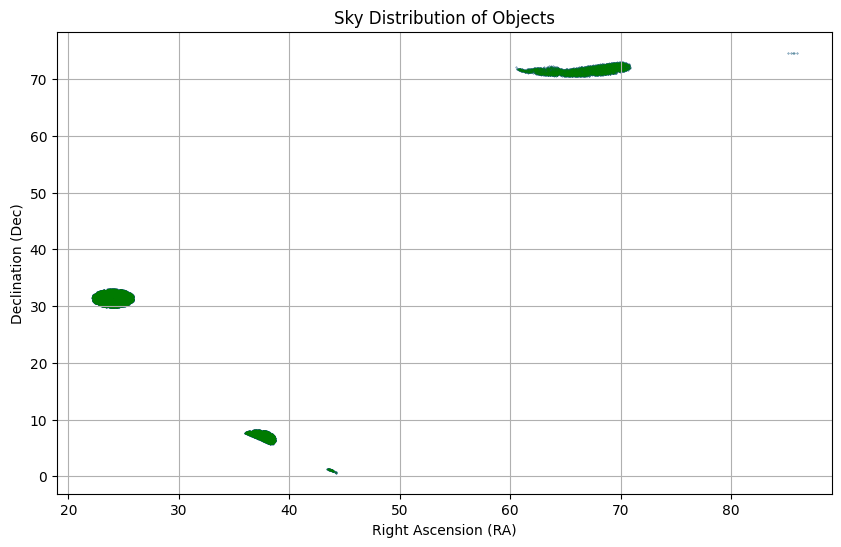

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['target_ra'], df['target_dec'], s=0.1, alpha=0.5,c="blue")
plt.scatter(df['plate_ra'],df['plate_dec'],s=0.1,alpha=0.5,c="green")
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Sky Distribution of Objects')
plt.grid(True)
plt.show()

In [18]:
(df['target_ra']-df['plate_ra']).describe()

,0
count,10000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [20]:
(df['target_dec']-df['plate_dec']).describe()

,0
count,10000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


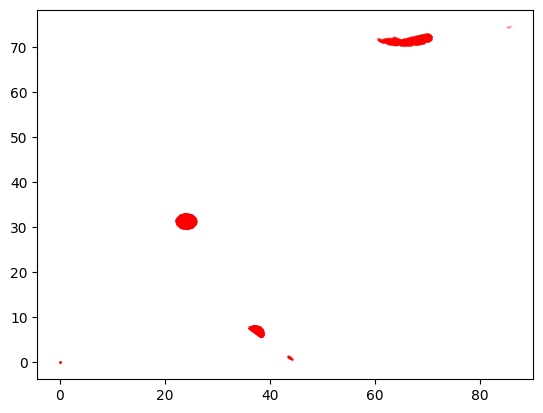

In [21]:
plt.scatter(df['mean_fiber_ra'],df['mean_fiber_dec'],s=0.1,alpha=0.5,c='red')

In [26]:
ra_diff=df['target_ra']-df['mean_fiber_ra']
dec_diff=df['target_dec']-df['mean_fiber_dec']
diff=pd.concat([ra_diff,dec_diff],axis=1)
diff.columns=['ra_difference','dec_difference']
print(diff.describe())

       ra_difference  dec_difference
count   1.000000e+04    10000.000000
mean    1.079459e-01        0.066920
std     2.399003e+00        2.050990
min    -8.384469e-02       -0.023013
25%    -1.127019e-05       -0.000006
50%    -1.776357e-14        0.000001
75%     1.094940e-05        0.000010
max     7.081792e+01       72.498882


In [28]:
good_ra_diff=good['target_ra']-good['mean_fiber_ra']
good_dec_diff=good['target_dec']-good['mean_fiber_dec']
good_diff=pd.concat([good_ra_diff,good_dec_diff],axis=1)
good_diff.columns=['ra_difference','dec_difference']
print(good_diff.describe())

       ra_difference  dec_difference
count   6.989000e+03     6989.000000
mean    4.633706e-07        0.000002
std     2.420494e-05        0.000012
min    -2.978611e-04       -0.000079
25%    -1.197537e-05       -0.000006
50%    -9.889869e-07        0.000002
75%     1.127944e-05        0.000010
max     3.131987e-04        0.000130


In [30]:
df[(dec_diff>1)|(ra_diff>1)]['zwarn'].value_counts()

,count
zwarn,
646,22


In [31]:
df[["std_fiber_ra","std_fiber_dec"]].describe()

,std_fiber_ra,std_fiber_dec
count,10000.000000,10000.000000
mean,0.027688,0.033642
std,0.037434,0.046932
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.056000,0.062595
max,0.397078,0.551346


In [32]:
good[["std_fiber_ra","std_fiber_dec"]].describe()

,std_fiber_ra,std_fiber_dec
count,6989.000000,6989.000000
mean,0.029692,0.036189
std,0.037968,0.048373
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.059252,0.065793
max,0.397078,0.551346


In [ ]:
type_count('subtype')

star: subtype
K     2503
G     1262
M      497
F      120
A       15
WD      12
CV       1
Name: count, dtype: int64
galaxy: Series([], Name: count, dtype: int64)
qso: subtype
HIZ    275
LOZ    254
Name: count, dtype: int64


In [ ]:
df['zwarn'].value_counts()

,count
zwarn,
0,6989
5,917
518,629
1,506
4,317
2049,217
519,144
2053,120
646,46


In [ ]:
stat_compare('chi2')

                all          good           bad
count  1.000000e+04  6.989000e+03  3.011000e+03
mean   7.407000e+98  2.942717e+04  2.459980e+99
std    2.473515e+99  5.572200e+04  4.011691e+99
min    2.038032e+02  6.461573e+03  2.038032e+02
25%    8.452019e+03  8.750154e+03  7.062633e+03
50%    9.286377e+03  1.034981e+04  8.378028e+03
75%    2.959663e+04  2.804564e+04  9.000000e+99
max    9.000000e+99  1.791697e+06  9.000000e+99


In [ ]:
stat_compare('deltachi2')

                all          good            bad
count  1.000000e+04  6.989000e+03    3011.000000
mean   6.670701e+04  9.473957e+04    1639.060002
std    1.891570e+05  2.199886e+05   21125.608711
min    0.000000e+00  9.103067e+00       0.000000
25%    1.447556e+01  8.519634e+02       0.000000
50%    1.271863e+03  7.642574e+03       3.255092
75%    4.339760e+04  8.414007e+04      10.049456
max    6.648438e+06  6.648438e+06  747452.397220


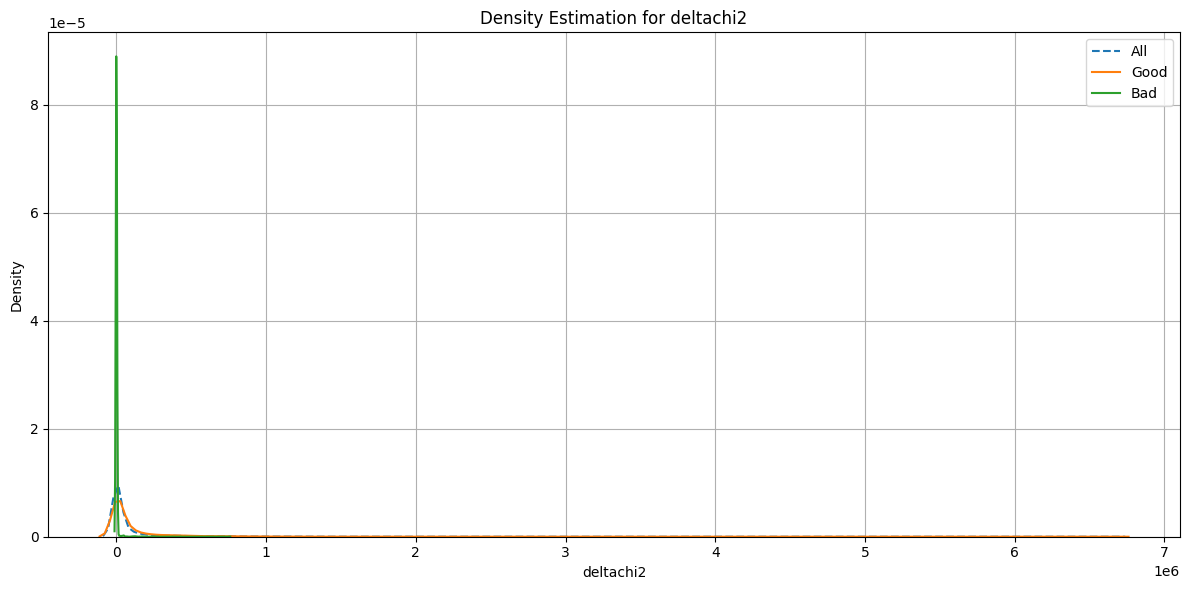

In [ ]:
stat_plot("deltachi2")

In [ ]:
print(len(df[df['npixels']==0]))
print(len(good[good['npixels']==0]))
print(len(df[df['deltachi2']<=1]))
print(len(good[good['deltachi2']<=1]))

823
0
1057
0


In [ ]:
df[df['healpix']!=df['spgrpval']].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
healpix,spgrpval,z,zerr,zwarn,chi2,npixels,spectype,subtype,ncoeff,deltachi2,coadd_fiberstatus,target_ra,target_dec,pmra,pmdec,ref_epoch,fa_target,fa_type,subpriority,obsconditions,release,brickid,brick_objid,morphtype,ebv,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,sersic,shape_r,shape_e1,shape_e2,gaia_phot_g_mean_mag,gaia_phot_bp_mean_mag,gaia_phot_rp_mean_mag,parallax,priority_init,numobs_init,cmx_target,desi_target,bgs_target,mws_target,scnd_target,sv1_desi_target,sv1_bgs_target,sv1_mws_target,sv1_scnd_target,sv2_desi_target,sv2_bgs_target,sv2_mws_target,sv2_scnd_target,sv3_desi_target,sv3_bgs_target,sv3_mws_target,sv3_scnd_target,plate_ra,plate_dec,coadd_numexp,coadd_exptime,coadd_numnight,coadd_numtile,mean_delta_x,rms_delta_x,mean_delta_y,rms_delta_y,mean_psf_to_fiber_specflux,mean_fiber_ra,std_fiber_ra,mean_fiber_dec,std_fiber_dec,min_mjd,max_mjd,mean_mjd,tsnr2_gpbdark_b,tsnr2_elg_b,tsnr2_gpbbright_b,tsnr2_lya_b,tsnr2_bgs_b,tsnr2_gpbbackup_b,tsnr2_qso_b,tsnr2_lrg_b,tsnr2_gpbdark_r,tsnr2_elg_r,tsnr2_gpbbright_r,tsnr2_lya_r,tsnr2_bgs_r,tsnr2_gpbbackup_r,tsnr2_qso_r,tsnr2_lrg_r,tsnr2_gpbdark_z,tsnr2_elg_z,tsnr2_gpbbright_z,tsnr2_lya_z,tsnr2_bgs_z,tsnr2_gpbbackup_z,tsnr2_qso_z,tsnr2_lrg_z,tsnr2_gpbdark,tsnr2_elg,tsnr2_gpbbright,tsnr2_lya,tsnr2_bgs,tsnr2_gpbbackup,tsnr2_qso,tsnr2_lrg,main_nspec,sv_nspec,zcat_nspec,zcat_primary,


In [ ]:
type_describe('zerr')

                all          star        galaxy         qso
count  1.000000e+04  4.410000e+03  5.061000e+03  529.000000
mean   6.521724e-05  3.812789e-06  7.545935e-05    0.000479
std    1.531283e-04  1.102322e-05  6.939588e-05    0.000439
min    2.232146e-46  2.013525e-07  2.232146e-46    0.000005
25%    1.105689e-06  8.296779e-07  1.174129e-05    0.000191
50%    6.564197e-06  1.527698e-06  6.982196e-05    0.000359
75%    8.703293e-05  4.078908e-06  1.126418e-04    0.000621
max    3.394124e-03  4.788014e-04  7.368234e-04    0.003394


In [ ]:
type_describe('sersic')

                all         star       galaxy         qso
count  10000.000000  4410.000000  5061.000000  529.000000
mean       0.353065     0.004762     0.682071    0.109058
std        0.958355     0.125009     1.242824    0.591239
min        0.000000     0.000000     0.000000    0.000000
25%        0.000000     0.000000     0.000000    0.000000
50%        0.000000     0.000000     0.000000    0.000000
75%        0.000000     0.000000     1.000000    0.000000
max        6.000000     4.000000     6.000000    6.000000


In [ ]:
type_describe('shape_r')

                all         star       galaxy         qso
count  10000.000000  4410.000000  5061.000000  529.000000
mean       0.163075     0.000882     0.317473    0.038054
std        0.464935     0.022386     0.608619    0.275174
min        0.000000     0.000000     0.000000    0.000000
25%        0.000000     0.000000     0.000000    0.000000
50%        0.000000     0.000000     0.000000    0.000000
75%        0.000000     0.000000     0.449717    0.000000
max        7.372897     1.070709     7.372897    4.929214


In [ ]:
type_count("ref_epoch")

star: ref_epoch
2015.5000    3915
2020.9597     480
0.0000         15
Name: count, dtype: int64
galaxy: ref_epoch
2020.9597    3107
0.0000       1806
2015.5000     148
Name: count, dtype: int64
qso: ref_epoch
2020.9597    374
0.0000       151
2015.5000      4
Name: count, dtype: int64


In [ ]:
type_describe("subpriority")

                all         star       galaxy         qso
count  10000.000000  4410.000000  5061.000000  529.000000
mean       0.599226     0.594046     0.620437    0.439483
std        0.329817     0.289808     0.354415    0.353284
min        0.000000     0.000000     0.000000    0.000000
25%        0.333625     0.361131     0.321196    0.053947
50%        0.687503     0.640894     0.761619    0.434136
75%        0.898060     0.854691     0.928640    0.765131
max        0.999915     0.999915     0.999910    0.999790


In [ ]:
type_count("fa_type")

star: fa_type
1     3982
3      413
4       12
0        2
16       1
Name: count, dtype: int64
galaxy: fa_type
1     3222
4     1761
0       39
3       33
8        3
16       3
Name: count, dtype: int64
qso: fa_type
1     378
4     149
16      1
0       1
Name: count, dtype: int64


In [ ]:
df[['release','obsconditions']].value_counts()

release  obsconditions
-1       568              3621
 9010    63               1459
         7                1234
         1                1223
 0       0                 773
 9010    3                 760
 0       63                549
-1       573               231
 9010    5                  97
-1       569                30
 9010    57                 10
         60                  6
 2       63                  5
 9010    59                  2
Name: count, dtype: int64

In [ ]:
df[['brickid','brick_objid']].describe()

,brickid,brick_objid
count,10000.000000,10000.000000
mean,442120.884300,980.807700
std,194519.678227,1484.235586
min,0.000000,-1.000000
25%,372202.000000,-1.000000
50%,501974.000000,0.000000
75%,509331.000000,1517.250000
max,650209.000000,6411.000000


In [ ]:
type_count("morphtype")
good['morphtype'].isna().sum()

star: morphtype
GPSF    3715
PSF      338
GGAL      41
DEV        4
REX        4
EXP        1
Name: count, dtype: int64
galaxy: morphtype
REX     1104
PSF     1043
DEV      413
EXP      239
SER      133
GPSF     111
GGAL      11
Name: count, dtype: int64
qso: morphtype
PSF     289
REX      19
DEV       6
GPSF      4
SER       3
EXP       1
Name: count, dtype: int64


np.int64(454)

In [ ]:
type_describe("ebv")

                all         star       galaxy         qso
count  10000.000000  4410.000000  5061.000000  529.000000
mean       0.099721     0.138729     0.068084    0.077198
std        0.071640     0.075869     0.049028    0.057271
min        0.035680     0.037974     0.035680    0.035847
25%        0.048772     0.066176     0.046452    0.047169
50%        0.060453     0.137754     0.051078    0.052539
75%        0.158316     0.206350     0.059828    0.067256
max        0.323558     0.321781     0.323558    0.301085


In [ ]:
type_count("ncoeff")

star: ncoeff
5    4409
3       1
Name: count, dtype: int64
galaxy: ncoeff
10    5061
Name: count, dtype: int64
qso: ncoeff
4    529
Name: count, dtype: int64
